In [32]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from math import sin, cos, sqrt, atan2, radians


In [33]:
def get_distance(addr1, addr2):
    return _get_distance(addr1['latitude'], addr1['longitude'], addr2['latitude'], addr2['longitude'])
    
def _get_distance(lon1, lat1, lon2, lat2):
    # approximate radius of earth in km
    R = 6373.0

    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [34]:
ADDRESSES_PER_ROUTE = 12

df = pd.read_csv('cords.csv')
df['visited'] = False
df.head(3)

number_of_routes = math.ceil(df['id'].count()/ADDRESSES_PER_ROUTE)
initial_groups = df['id'].sample(n=number_of_routes)
# df.loc[df.id.isin(initial_groups.values)] = 1

# this can be done without a loop
for i in range(len(initial_groups.values)):
    df.loc[df['id'] == initial_groups.values[i], 'visited'] = True

groups = [ [group] for group in initial_groups.array ]

# pd.set_option('display.max_rows', df.shape[0]+1)

print(groups)
# df

[[424], [486], [407], [463], [540], [558], [532], [515], [428], [462], [454], [435], [535]]


In [35]:
groups = [ [group] for group in initial_groups.array ]

not_yet_visited = df[df.visited == False]['id']

for address_id in not_yet_visited[:]:
    current_address = df[df.id==address_id]
#     print(current_address)
#     print(address_id)
    
    min_distance = math.inf
    potential_group = None
    
    for group in groups:
        if len(group) < ADDRESSES_PER_ROUTE:
            for temp_address_id in group:
                temp_address = df[df.id==temp_address_id]
                distance = get_distance(temp_address, current_address)
                if distance < min_distance:
                    min_distance = distance
                    potential_group = group
#     print(min_distance)
#     if min_distance < 0.5:
    potential_group.append(address_id)
        
for g in groups:
    print(g)

[424, 406, 410, 417, 423, 436, 438, 442, 449, 467, 482, 489]
[486, 412, 446, 451, 455, 458, 470, 475, 478, 483, 484, 487]
[407, 404, 405, 409, 413, 459, 460, 461, 468, 469, 471, 473]
[463, 521, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550]
[540, 419, 420, 422, 425, 429, 433, 440, 441, 444, 445, 447]
[558, 491, 492, 493, 495, 496, 497, 498, 500, 508, 509, 512]
[532, 411, 416, 499, 507, 513, 514, 516, 518, 523, 528, 529]
[515, 414, 485, 502, 510, 517, 522, 530, 533, 534, 536, 537]
[428, 421, 427, 448, 450, 452, 453, 456, 472, 474, 476, 480]
[462, 465, 501, 504, 506, 511, 519, 520, 524, 531, 538, 539]
[454, 403, 408, 415, 418, 426, 430, 431, 432, 434, 437, 443]
[435, 503, 505, 525, 551, 552, 466, 554, 555, 556, 557, 559]
[535, 402, 479, 481, 553, 560, 561, 562]


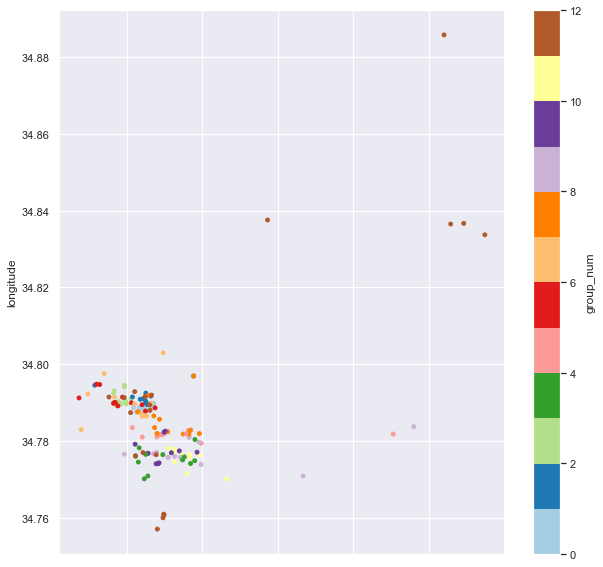

In [36]:
group_num = 0

for group in groups:
    for address_id in group:
        df.loc[df['id'] == address_id, 'group_num'] = group_num
    group_num += 1


plt.rcParams["figure.figsize"]=10,10
df.plot.scatter(x = 'latitude', y = 'longitude', c='group_num', s=15, cmap='Paired')

In [37]:
df

,id,latitude,longitude,visited,group_num
0,402,32.092894,34.836495,False,12.0
1,403,32.057278,34.775397,False,10.0
2,404,32.048285,34.792465,False,2.0
3,405,32.048297,34.789984,False,2.0
4,406,32.052074,34.788454,False,0.0
...,...,...,...,...,...
147,558,32.052512,34.787760,True,5.0
148,559,32.053304,34.791953,False,11.0
149,560,32.050543,34.787352,False,12.0
150,561,32.051088,34.792831,False,12.0
